In [1]:
pip install pandas numpy scikit-learn seaborn matplotlib


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # Import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [6]:

# Inspect the data
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:

# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [114]:
#Cleaning up the NaNs
df[df["SibSp"]==8]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
159,160,0,3,1,28.0,8,2,69.55,2
180,181,0,3,0,28.0,8,2,69.55,2
201,202,0,3,1,28.0,8,2,69.55,2
324,325,0,3,1,28.0,8,2,69.55,2
792,793,0,3,0,28.0,8,2,69.55,2
846,847,0,3,1,28.0,8,2,69.55,2
863,864,0,3,0,28.0,8,2,69.55,2


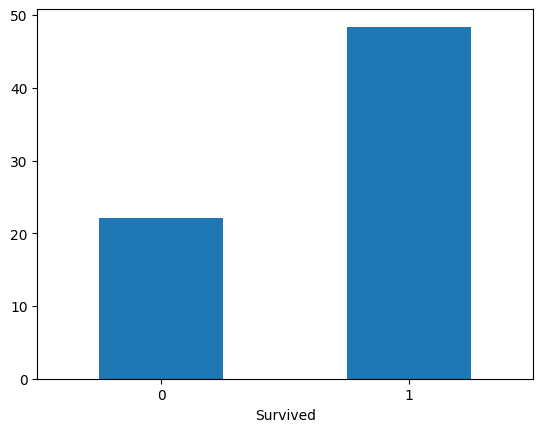

In [121]:
df.groupby("Survived")["Fare"].mean().plot(kind = "bar")
plt.xticks(rotation=0)
plt.show()

In [126]:
# Check the existing columns in your DataFrame
print(df.columns)

# Drop irrelevant columns (if they exist, and correct the names if needed)
if 'Name' in df.columns and 'Ticket' in df.columns:
    df.drop(columns=['Name', 'Ticket'], inplace=True)
    print("Columns 'Name' and 'Ticket' dropped successfully.")
else:
    print("One or both of the columns 'Name' and 'Ticket' were not found in the DataFrame.")

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
One or both of the columns 'Name' and 'Ticket' were not found in the DataFrame.


In [13]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [14]:
# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [21]:
!pip install skimpy
from skimpy import skim

# Assuming your DataFrame is named 'df'
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 891    │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ PassengerId    │   0 │      0 │      446 │    257.4 │     1 │   223.5 │    446 │  668.5 │    891 │ ▇▇▇▇▇▇  │  │
│ │ Survived       │   0 │      0 │   0.3838 │   0.4866 │     0 │       0 │      0 │      1 │      1 │ ▇    ▅  │  │
│ │ Pclass         │   0 │      0 │    2.309 │   0.8361 │     1 │       2 │      3 │      3 │      3 │ ▃  ▃ ▇  │  │
│ │ Sex            │   0 │      0 │   0.6476 │    0.478 │     0 │       0 │      1 │      1 │      1 │ ▅    ▇  │  │
│ │ Age            │   0 │      0 │    29.36 │    13.02 │  0.42 │      22 │     28 │     35 │     80 │  ▁▅▇▂▁  │  │
│ │ SibSp          │   0 │      0 │    0.523 │    1.103 │     0 │       0 │      0 │      1 │      8 │    ▇    │  │
│ │ Parch          │   0 │      0 │   0.3816 │   0.8061 │     0 │       0 │      0 │      0 │      6 │   ▇▁▁   │  │
│ │ Fare           │   0 │      0 │     32.2 │    49.69 │     0 │    7.91 │  14.45 │     31 │  512.3 │    ▇    │  │
│ │ Embarked       │   0 │      0 │    1.536 │   0.7915 │     0 │       1 │      2 │      2 │      2 │ ▂  ▁ ▇  │  │
│ └────────────────┴─────┴────────┴──────────┴──────────┴───────┴─────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [25]:
df.values

array([[  1.    ,   0.    ,   3.    , ...,   0.    ,   7.25  ,   2.    ],
       [  2.    ,   1.    ,   1.    , ...,   0.    ,  71.2833,   0.    ],
       [  3.    ,   1.    ,   3.    , ...,   0.    ,   7.925 ,   2.    ],
       ...,
       [889.    ,   0.    ,   3.    , ...,   2.    ,  23.45  ,   2.    ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,  30.    ,   0.    ],
       [891.    ,   0.    ,   3.    , ...,   0.    ,   7.75  ,   1.    ]])

In [27]:
for index, row in df.iterrows():
    print(index, row)


Streaming output truncated to the last 5000 lines.
391 PassengerId    392.0000
Survived         1.0000
Pclass           3.0000
Sex              1.0000
Age             21.0000
SibSp            0.0000
Parch            0.0000
Fare             7.7958
Embarked         2.0000
Name: 391, dtype: float64
392 PassengerId    393.000
Survived         0.000
Pclass           3.000
Sex              1.000
Age             28.000
SibSp            2.000
Parch            0.000
Fare             7.925
Embarked         2.000
Name: 392, dtype: float64
393 PassengerId    394.000
Survived         1.000
Pclass           1.000
Sex              0.000
Age             23.000
SibSp            1.000
Parch            0.000
Fare           113.275
Embarked         0.000
Name: 393, dtype: float64
394 PassengerId    395.0
Survived         1.0
Pclass           3.0
Sex              0.0
Age             24.0
SibSp            0.0
Parch            2.0
Fare            16.7
Embarked         2.0
Name: 394, dtype: float64
395 Passen

In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [30]:
# Standardize numerical features
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [31]:
# Preprocess categorical features
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [32]:
# Create the preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [33]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [36]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [39]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

Evaluating Logistic Regression...
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:


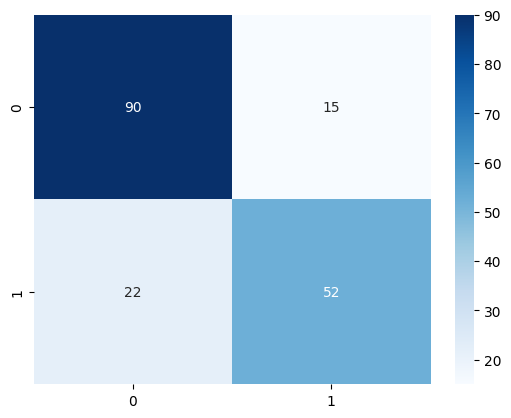

Evaluating Random Forest...
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:


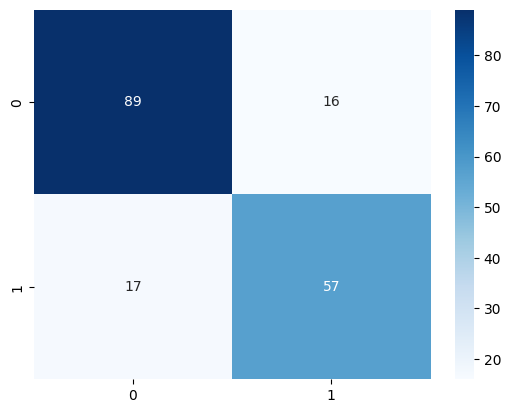

Evaluating Support Vector Machine...
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:


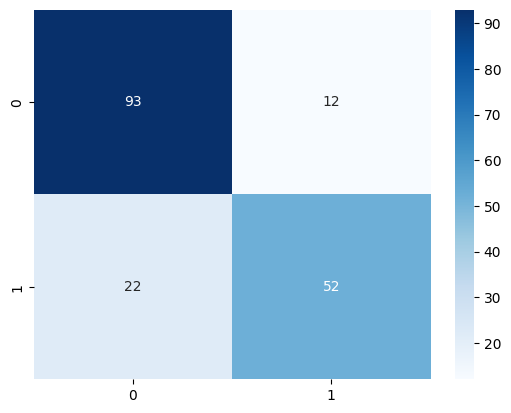

In [40]:
# Train and evaluate each model
for name, model in models.items():
    print(f'Evaluating {name}...')
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    evaluate_model(clf, X_train, y_train, X_test, y_test)

In [41]:
# Fine-tune the best model (Random Forest in this case)
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier(random_state=42))]),
    param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]})

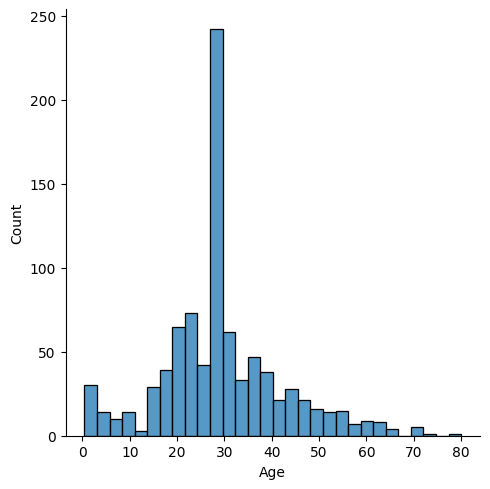

In [42]:
sns.displot(x= df["Age"])

In [45]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


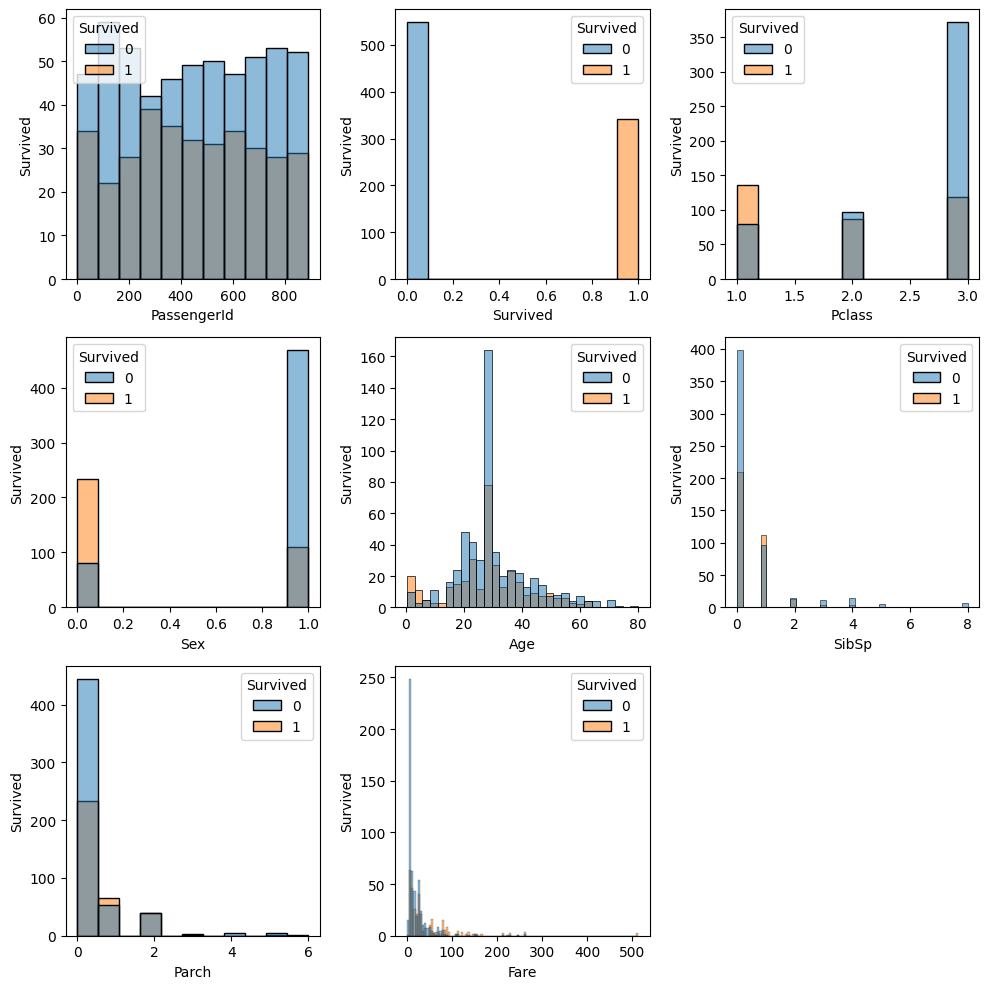

In [50]:
# Histplot
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,10))
i=1
for col in df:
    if i <9:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=df[col],hue=df['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survived')
    i=i+1
plt.tight_layout()

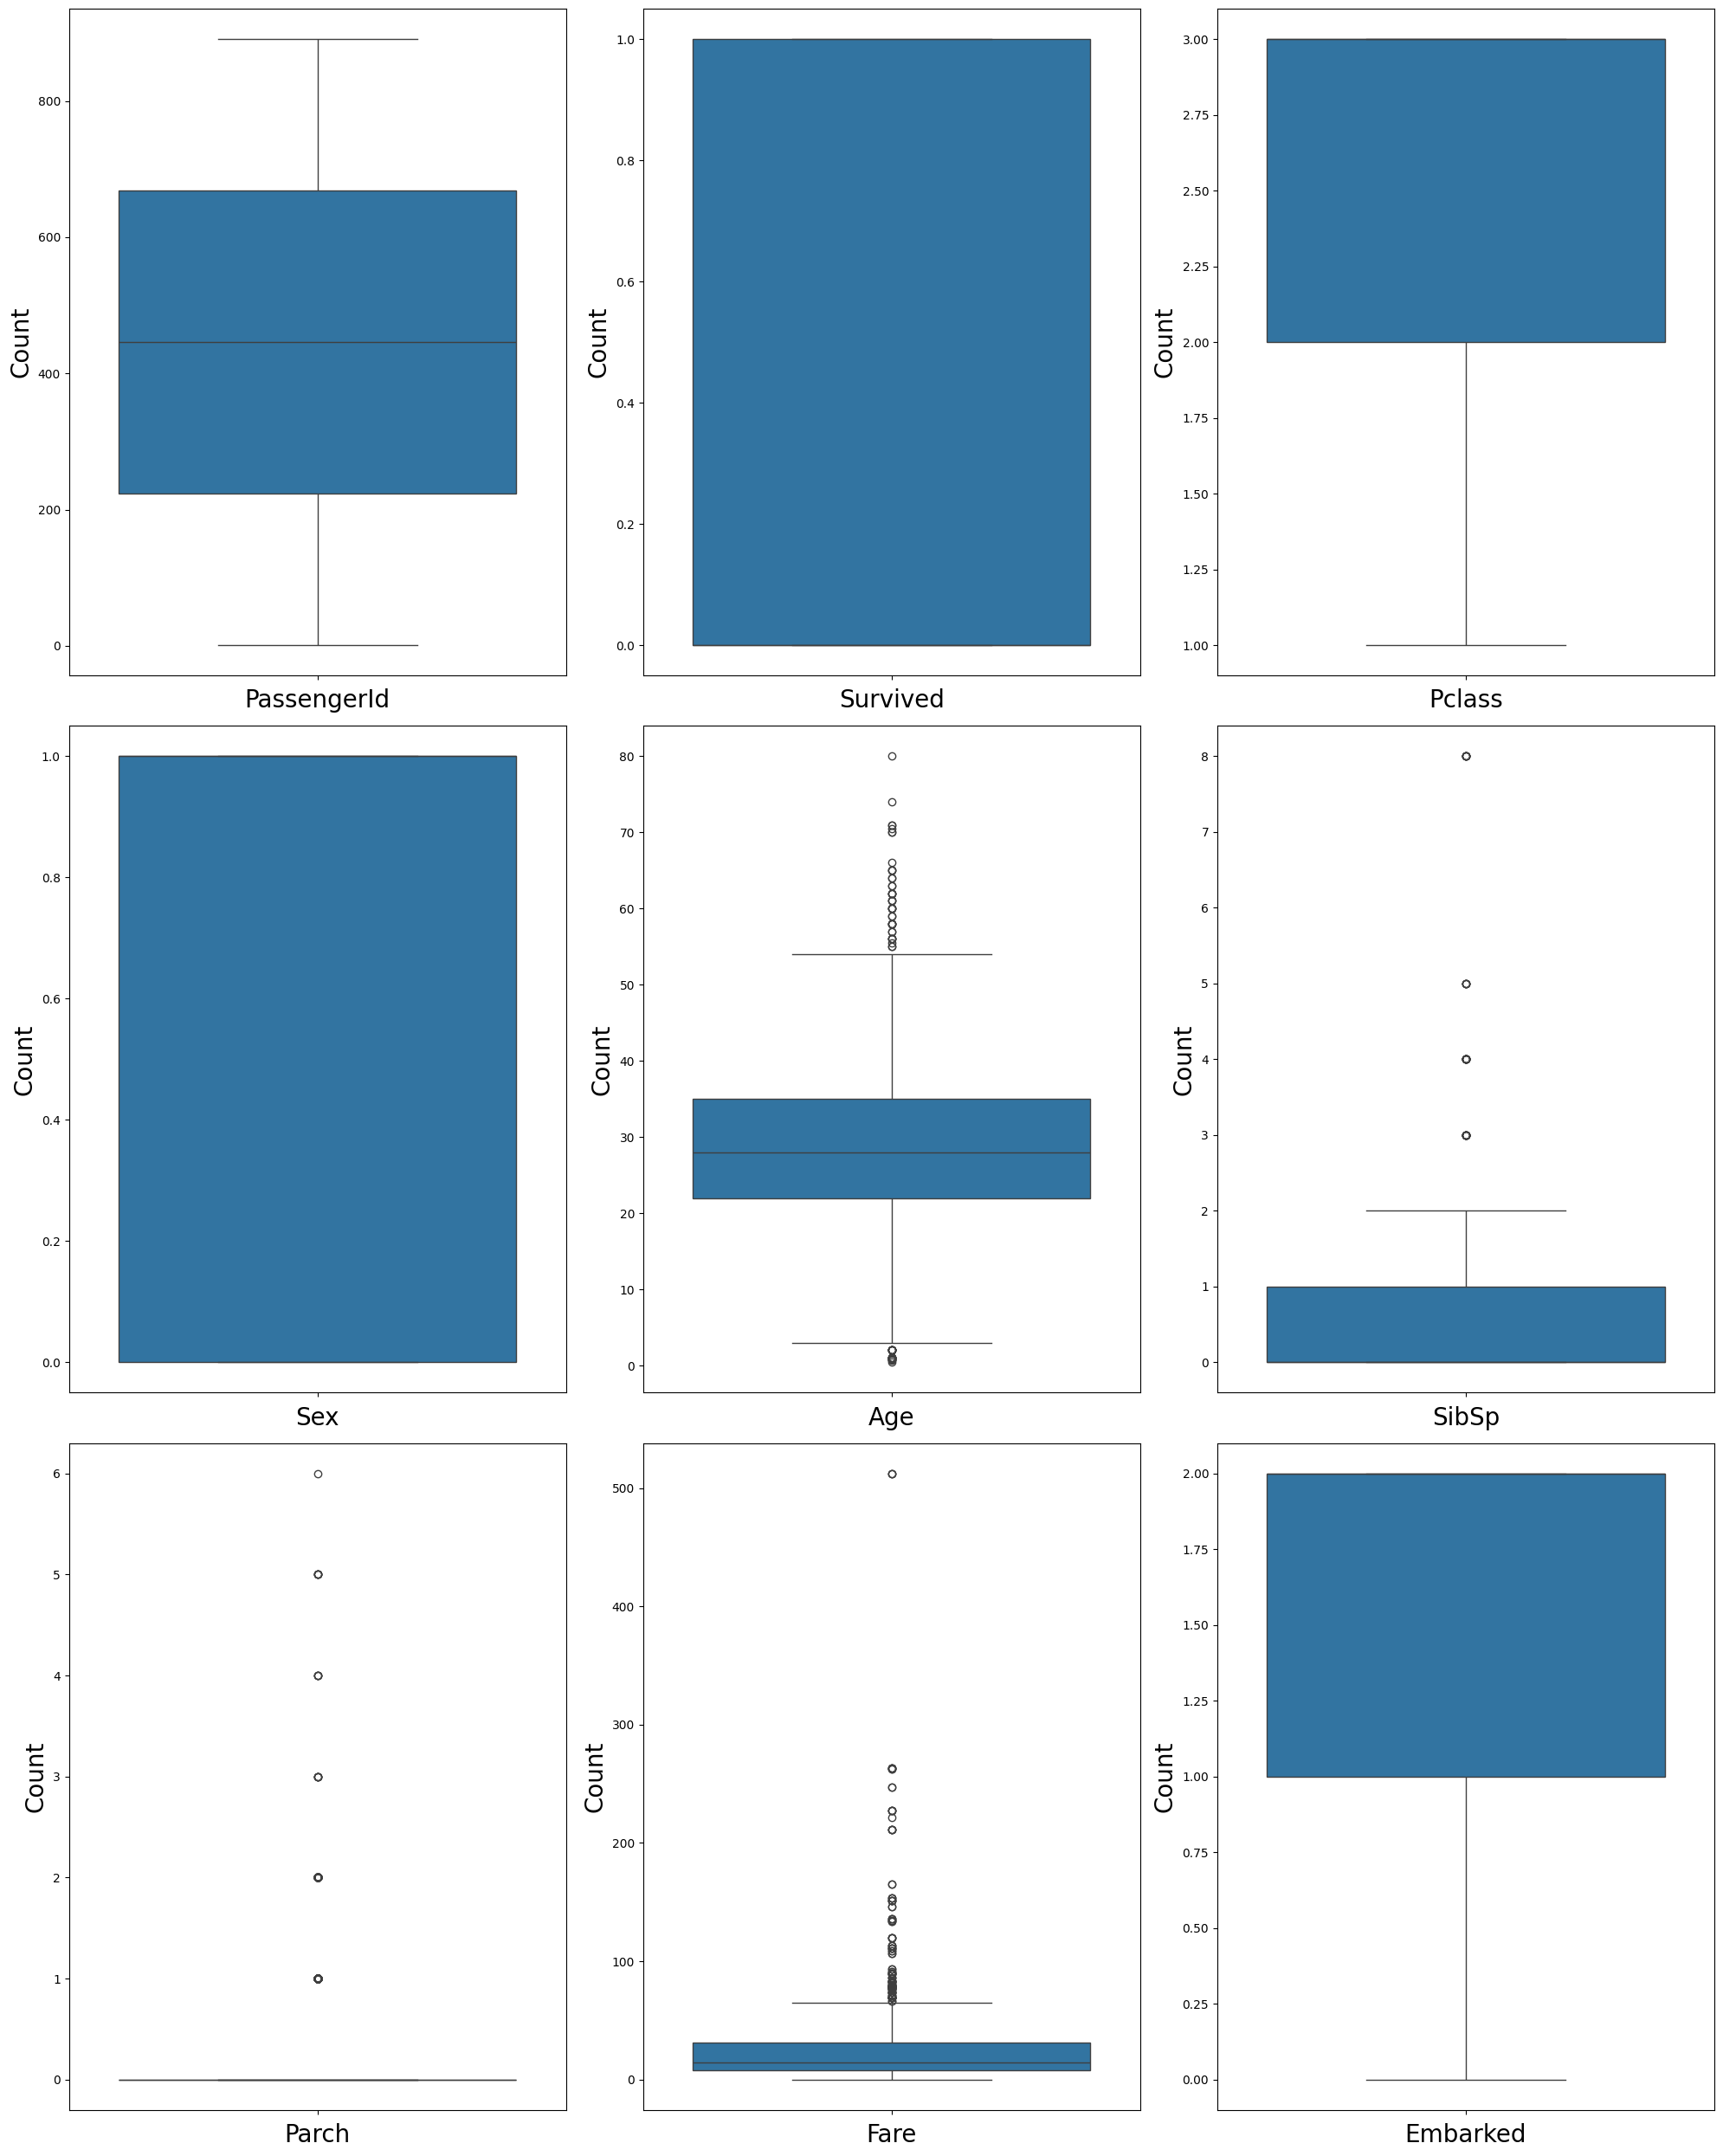

In [53]:
import warnings
warnings.filterwarnings("ignore")

#Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [55]:
df.shape

(891, 9)

In [57]:
con_df= df[["Survived",'Pclass', 'Sex','SibSp', 'Parch','Embarked']]

In [58]:
con_df.shape

(891, 6)

<Axes: >

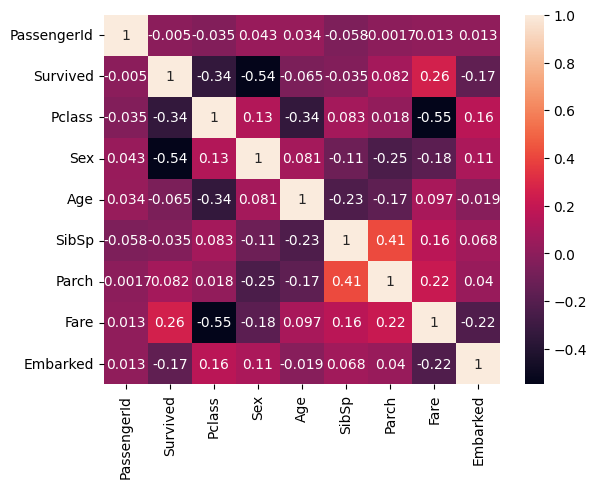

In [59]:
# Feature Selection
sns.heatmap(df.corr(),annot= True)


Evaluating the best model after hyperparameter tuning...
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:


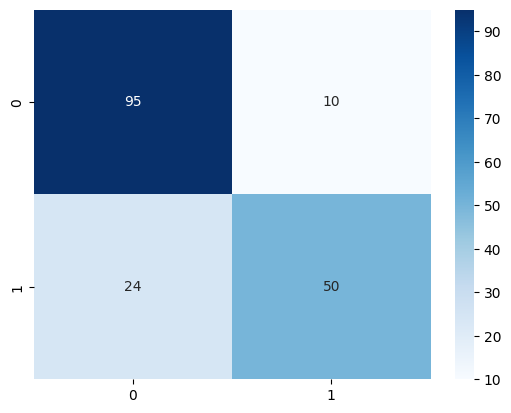

In [105]:
# Best model evaluation
best_model = grid_search.best_estimator_
print("\nEvaluating the best model after hyperparameter tuning...")
evaluate_model(best_model, X_train, y_train, X_test, y_test)

In [62]:
X_test.shape

(179, 8)

In [64]:
X_train.shape

(712, 8)

In [67]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred=clf.predict(X_test)

In [70]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[88 17]
 [23 51]]


In [73]:
# Count of Actual output PREDICTED OUPUT
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,88,17
1,23,51


In [74]:
Acc = accuracy_score(y_test,y_pred)
Acc

0.776536312849162

In [75]:
recall=recall_score(y_test,y_pred)
recall

0.6891891891891891

In [76]:
precision=precision_score(y_test,y_pred)
precision

0.75

In [77]:
f1score=f1_score(y_test,y_pred)
f1score

0.7183098591549296

In [78]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [81]:
from sklearn.model_selection import train_test_split
X_train.s,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(X_train,y_train)
from collections import Counter
Counter(y_train)

Counter({0: 444, 1: 268})

In [85]:
Counter(y_smote)

Counter({0: 444, 1: 444})

In [86]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(x_smote, y_smote)


SVC()

In [88]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6759776536312849

In [91]:
#Cross Validation
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model,X,y,cv=10,scoring = 'accuracy')
cross_val

array([0.6       , 0.62921348, 0.65168539, 0.69662921, 0.65168539,
       0.66292135, 0.65168539, 0.68539326, 0.69662921, 0.62921348])

In [92]:
print('Cross validation score',cross_val.std())

Cross validation score 0.02972839216718344


In [94]:
# Traning accuacy
y_pred_train = model.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.6811797752808989

In [98]:

# Display the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print("Model training and evaluation completed successfully.")

Best hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Model training and evaluation completed successfully.


In [97]:
#Hyperparameter Tuning
param_grid = {'C':[1,5,10,50,60,70],
              'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],
              'random_state':list(range(1,20))}
from sklearn.model_selection import GridSearchCV

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [99]:
model1 = SVC(C=10000,gamma=0.001,random_state=40)
model1.fit(x_smote,y_smote)

SVC(C=10000, gamma=0.001, random_state=40)

In [100]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1])

In [101]:
accuracy_score(y_test,y_pred1)

0.5921787709497207

In [111]:
from sklearn.metrics import confusion_matrix
# Assuming y_pred1 from your previous code is what you meant to use
confusion_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[71 34]
 [39 35]]


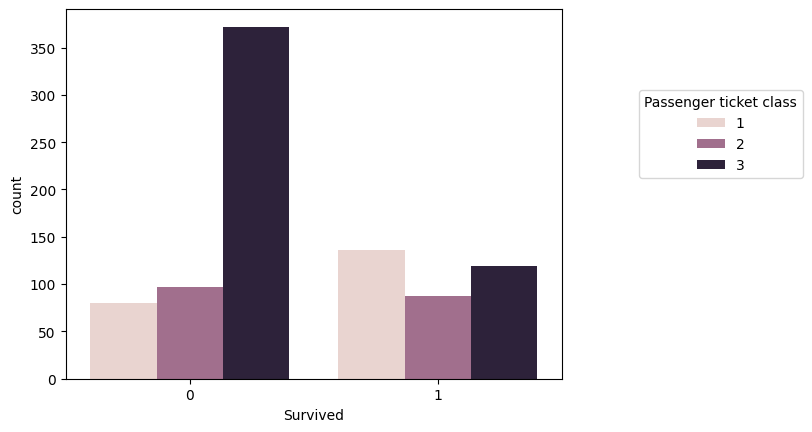

In [129]:
# Melt the dataframe to convert it to long form
df_melted = pd.melt(df, id_vars=['Survived'], value_vars=['Pclass'])

# Now use the melted dataframe for the countplot
sns.countplot(data=df_melted, x='Survived', hue='value')
plt.legend(bbox_to_anchor=(1.5,0.8),title="Passenger ticket class")
plt.show()

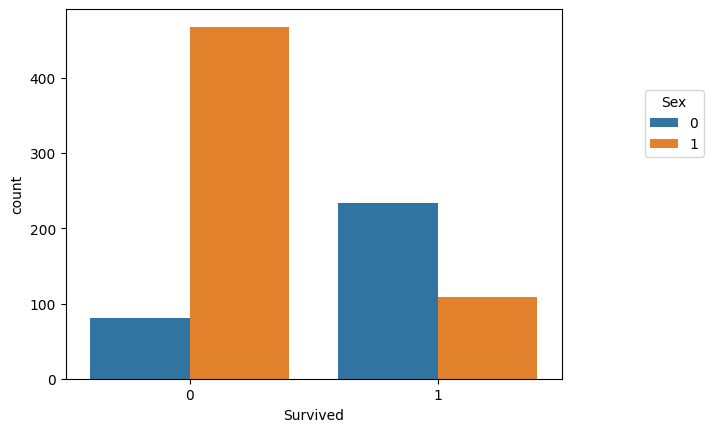

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame containing the Titanic dataset
# If 'df' is not defined, load the dataset first
# Example:
# df = sns.load_dataset('titanic')

#Does Gender affect survival?
sns.countplot(data=df, x="Survived", hue="Sex")
plt.legend(bbox_to_anchor=(1.3,0.8),title="Sex")
plt.show()

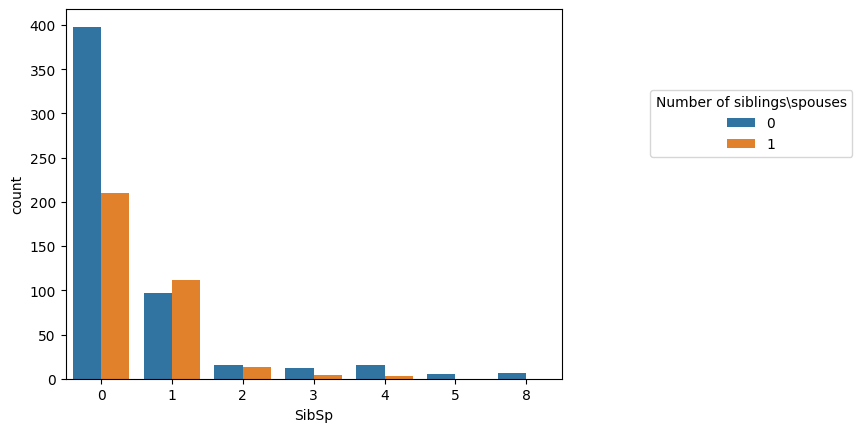

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

#Does the Number of siblings\spouses or children/parents affect survival?
sns.countplot(data=df,x="SibSp",hue="Survived") # Switched 'X' and 'hue' parameters
plt.legend(bbox_to_anchor=(1.6,0.8),title="Number of siblings\spouses")
plt.show()